In [1]:
import ctypes
import random
import numpy
import numpy as np
import pandas
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [2]:
dll = ctypes.CDLL("libcpp2PA.dylib")

# Fonctionnement d'un perceptron simple

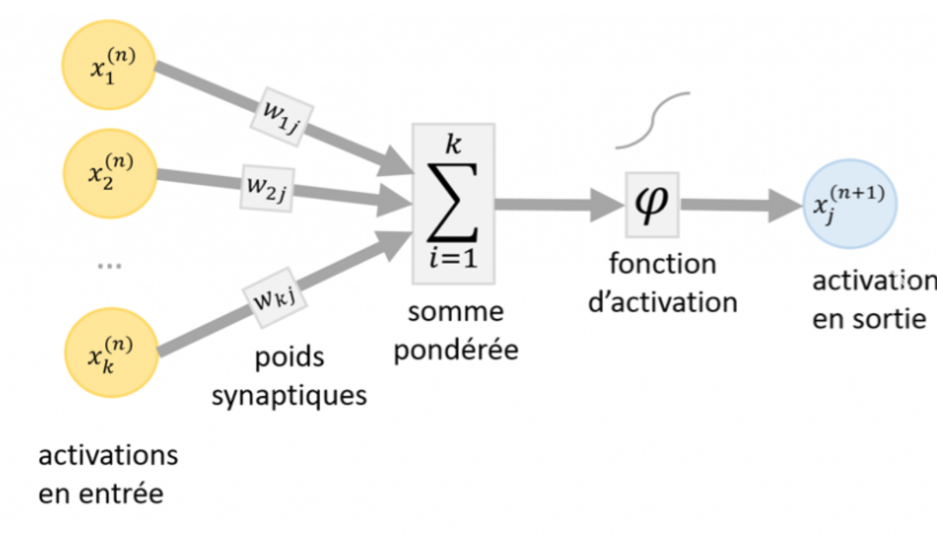

In [2]:
from IPython.display import Image
Image(filename='../pictures/PerceptronSimple.png', width=500, height=20)

# Déclaration et préparation des données d'entrainement

## Importation des données

In [3]:
#charge et prépare le dataset
#load and prépare dataset

dataset = numpy.genfromtxt("../dataSet/Concrete_Data_Yeh.csv", delimiter=",",skip_header=1)
readData = pd.read_csv("../dataSet/Concrete_Data_Yeh.csv", delimiter=",")
#readData.head()

## Preprocessing

### Dataset Entrainement et de test

In [7]:
Xtrain = readData.values[:,:-1]
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(Xtrain)

# Run the normalizer on the dataframe
Xtrain = pd.DataFrame(x_scaled)

Xtrain = Xtrain.as_matrix()

#Transforme to OneDimensions
Xtrain  = Xtrain.ravel()

#predict
Y = dataset[:,8]

## Initialisation de W

In [10]:
#Creation function initializer W
cfuncType = ctypes.CFUNCTYPE(ctypes.POINTER(ctypes.c_double), 
                             ctypes.c_int32)
#Call function createLinearModel
func = cfuncType(("createLinearModel",dll))

#Using function createLinearModel
W = func(9)

# ------------------------------------REGRESSION---------------------------------------

## Préparation des données pour regression

In [13]:
#param[0] = alpha;
#param[1] = iterMax;
#param[2] = biais;
#param[3] = (Up) ? 3 : 2; //nombre d'input
#param[4] = 0; // 0: pas de prétraitement / 1 : Standardisation / 2 : Normalisation
#param[5] = (Rosenblatt) ? 1 : 0;
#param[6] = count; // taille du tableau result
#param[7] = Couche.Length;
#param[8] = (Classification) ? 1 : 0;
param = [0.01,
        5000,
        0.5,
        8,
        0,
        1,
        Y.size,
        0,
        0]
print(Y.size)

1030


In [14]:
#Cast list to ctypes.c_double

#Cast input
Xtrain = (ctypes.c_double * len(Xtrain))(*Xtrain)
#Cast output
Y = (ctypes.c_double * len(Y))(*Y)
#cast param
param = (ctypes.c_double * len(param))(*param)

## entrainement

In [15]:
#Creation function Train
cfuncTypeTrainR = ctypes.CFUNCTYPE(None, ctypes.POINTER(ctypes.c_double), 
                                   ctypes.c_double * len(Xtrain), 
                                   ctypes.c_double * len(Y),
                                   ctypes.c_double * len(param))

#Call function trainLinearModelR
funct_TrainR = cfuncTypeTrainR(("trainLinearModelRl",dll))

In [17]:
#Using function trainLinearModelR
funct_TrainR(W,Xtrain,Y,param)

## Prediction

In [20]:
Xtest = [1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720,0.074176]


In [21]:
Xtest = (ctypes.c_double * len(Xtest))(*Xtest)

In [22]:
#Creation function Predict
cfunctTypePredR = ctypes.CFUNCTYPE(ctypes.c_double,
                                   ctypes.POINTER(ctypes.c_double),
                                  ctypes.c_double * len(Xtest),
                                  ctypes.c_double * len(param))
#Call function predictLinearModelR
func_predictR = cfunctTypePredR(("predictLinearModelRl",dll))

In [24]:
#Using function predictLinearModelR
w = func_predictR(W,Xtest,param)

# EVALUATION DU MODELE

In [25]:
print(w)

53.463474941597305


## Delete

In [27]:
#Delete model
cfunctTypeDelete = ctypes.CFUNCTYPE(None,
                                   ctypes.POINTER(ctypes.c_double))
#call function deleteLinearModel
func_delete = cfunctTypeDelete(("deleteLinearModel",dll))

In [28]:
func_delete(W)